# Notebook Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading the Dataset

In [2]:
data = pd.read_csv('Survey.csv')

# Exploratory Data Analysis (EDA)

In [3]:
data.head()

,Age,Gender,State/ Union Territory,City,Monthly Family Income,Product Interested in Buying Online,Employment Status,You preferably use for shopping online,Have you heard about XPay ?
0,22,Female,West Bengal,Tier 1,10-30K,Books,Self-Employeed,Amazon,No
1,23,Male,West Bengal,Tier 1,50-70K,Mobile Accessories (including earphones and he...,9-5 Job,Flipkart,No
2,23,Male,West Bengal,Tier 2,10-30K,Mobile Accessories (including earphones and he...,Student,Flipkart,No
3,22,Male,West Bengal,Tier 3,10K and Below,Books,Student,Flipkart,No
4,24,Male,West Bengal,Tier 1,30-50K,Mobile Accessories (including earphones and he...,Student,Flipkart,Yes


In [4]:
data.tail()

,Age,Gender,State/ Union Territory,City,Monthly Family Income,Product Interested in Buying Online,Employment Status,You preferably use for shopping online,Have you heard about XPay ?
195,45,Female,West Bengal,Tier 3,10K and Below,"Fashion Items ( Perfumes, Cosmetics etc)",Self-Employeed,Flipkart,No
196,23,Male,West Bengal,Tier 1,70K and Above,Mobile Accessories (including earphones and he...,Student,Flipkart,No
197,60,Female,West Bengal,Tier 1,10-30K,Mobile Accessories (including earphones and he...,9-5 Job,Amazon,No
198,24,Male,West Bengal,Tier 1,50-70K,Mobile Accessories (including earphones and he...,Student,Flipkart,No
199,32,Female,Uttar Pradesh,Tier 2,50-70K,Online Bill Payments,Self-Employeed,Amazon,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age                                      200 non-null    int64 
 1   Gender                                   200 non-null    object
 2   State/ Union Territory                   200 non-null    object
 3   City                                     200 non-null    object
 4   Monthly Family Income                    200 non-null    object
 5   Product Interested in Buying Online      200 non-null    object
 6   Employment Status                        200 non-null    object
 7   You preferably use  for shopping online  200 non-null    object
 8   Have you heard about XPay ?              200 non-null    object
dtypes: int64(1), object(8)
memory usage: 14.2+ KB


In [6]:
# Checking for null values if any 
pd.isnull(data).sum()

Age                                        0
Gender                                     0
State/ Union Territory                     0
City                                       0
Monthly Family Income                      0
Product Interested in Buying Online        0
Employment Status                          0
You preferably use  for shopping online    0
Have you heard about XPay ?                0
dtype: int64

### Monthly Family Income vs Online Commodity Preferred 

In [7]:
group_data = data.groupby(['Monthly Family Income', 'Product Interested in Buying Online'])

In [8]:
group_data.count()

Age  \
Monthly Family Income Product Interested in Buying Online                       
10-30K                Books                                                13   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    3   
                      Fashion Items ( Perfumes, Cosmetics etc)              8   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    4   
                      Home Accessories (Eg: Chair, Tables)                  2   
                      Mobile Accessories (including earphones and hea...   12   
                      Online Bill Payments                                  1   
                      Shoes                                                 7   
                      Watches                                               2   
10K and Below         Bags                                                  4   
                      Books                                                10   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    1   
                      Fashion Items ( Perfumes, Cosmetics etc)              5   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    5   
                      Home Accessories (Eg: Chair, Tables)                  1   
                      Mobile Accessories (including earphones and hea...   11   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    3   
30-50K                Bags                                                  2   
                      Books                                                18   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    2   
                      Fashion Items ( Perfumes, Cosmetics etc)              3   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    5   
                      Home Accessories (Eg: Chair, Tables)                  2   
                      Mobile Accessories (including earphones and hea...    4   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    4   
                      Shoes                                                 1   
                      Watches                                               1   
50-70K                Bags                                                  2   
                      Books                                                 6   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    2   
                      Fashion Items ( Perfumes, Cosmetics etc)              2   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...    6   
                      Home Accessories (Eg: Chair, Tables)                  1   
                      Mobile Accessories (including earphones and hea...    6   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    4   
                      Online Bill Payments                                  2   
70K and Above         Books                                                 7   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...    1   
                      Fashion Items ( Perfumes, Cosmetics etc)              4   
                      Gadgets (Eg: Laptops, Mobiles, Desktop peripher...   11   
                      Mobile Accessories (including earphones and hea...    5   
                      OTT Platform Subscriptions (Eg: Amazon Prime, N...    5   
                      Shoes                                                 2   

                                                                          Gender  \
Monthly Family Income Product Interested in Buying Online                          
10-30K                Books                                                   13   
                      Electrical Appliances (Eg: AC, TV, Mixer Grinde...       3   
                      Fashion Items ( Perfumes, Cosmetics etc)                 8   
        

From the above grouped data analysis it can be figured out that people falling in the income range of **10K and Below** to **70K** usually prefer buying books online , whereas people falling in the income range of **50-70K and Above** prefer buying Electronic Gadgets such as Laptops, Mobiles, Watches etc from online stores . 

### Online Commodity preferred v/s Age

In [9]:
group_data_age = data.groupby(['Product Interested in Buying Online'])
mean_age = group_data_age['Age'].mean()

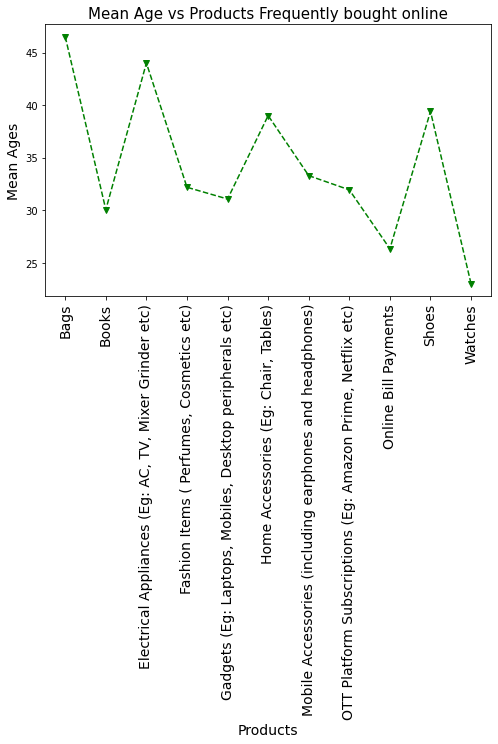

In [10]:
colors = {'Male':'tab:blue', 'Female':'tab:orange'}

plt.figure(figsize=(8, 5))
plt.plot(mean_age, 'gv--')
plt.xticks(rotation=90, fontsize=14)
plt.title('Mean Age vs Products Frequently bought online', fontsize=15)
plt.xlabel('Products', fontsize=14)
plt.ylabel('Mean Ages', fontsize=14)
plt.show()

### Now let's see how the gender is influencing the market alongside the age

In [11]:
new_data = pd.concat([data['Gender'], data['Age'], data['Product Interested in Buying Online']], axis=1)
new_group_male = new_data[new_data.Gender=='Male'].groupby('Product Interested in Buying Online')
new_group_female = new_data[new_data.Gender=='Female'].groupby('Product Interested in Buying Online')

In [12]:
age_male = new_group_male['Age'].mean()
age_female = new_group_female['Age'].mean()

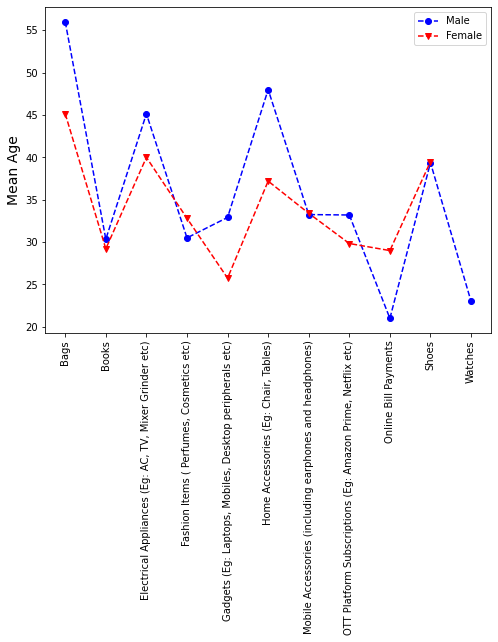

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(age_male, 'bo--')
plt.plot(age_female, 'rv--')
plt.xticks(rotation=90)
plt.ylabel('Mean Age', fontsize=14)
plt.legend(labels=('Male', 'Female'))
plt.show()

#### Few Notable Conclusion from the above data analysis :

1) Fashion Items are mostly bought online by women having a mean age greater than that of men , and online bill payments have a similar trend as well . 

2) Mobile Accessories, Books and Shoes are bought online by men and women having almost the same mean age .

3) Other than these two , in all other categories the average or mean age of men is greater than that of women . 

### City Tier vs Online Products

In [14]:
pie_chart = []

num = data[data.City=='Tier 1'].count()
pie_chart.append(num.Age)

num = data[data.City=='Tier 2'].count()
pie_chart.append(num.Age)

num = data[data.City=='Tier 3'].count()
pie_chart.append(num.Age)

**This is the percentage of Tier 1 , Tier 2 and Tier 3 readings in the data**

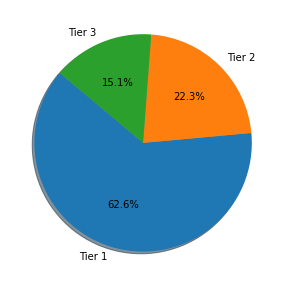

In [15]:
labels = 'Tier 1', 'Tier 2', 'Tier 3'

plt.figure(figsize=(5, 5))
plt.pie(pie_chart, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [16]:
group_tier1 = data[data.City=='Tier 1'].groupby('Product Interested in Buying Online')
group_tier2 = data[data.City=='Tier 2'].groupby('Product Interested in Buying Online')
group_tier3 = data[data.City=='Tier 3'].groupby('Product Interested in Buying Online')

In [17]:
new_list = data['Product Interested in Buying Online'].unique()

Tier_1, Tier_2, Tier_3 = [], [], []
labels2, labels3 = [], []

for i in new_list:
    Tier_1.append(group_tier1.get_group(i).Age.count())
    
for i in new_list:
    if i=='Shoes':
        pass
    else:
        labels2.append(i)
        Tier_2.append(group_tier2.get_group(i).Age.count())
        
for i in new_list:
    if i=='Shoes' or i=='Electrical Appliances (Eg: AC, TV, Mixer Grinder etc)' or i=='Watches' or i=='Home Accessories (Eg: Chair, Tables)':
        pass
    else:
        labels3.append(i)
        Tier_3.append(group_tier3.get_group(i).Age.count())

### Now we'll see how the items are distributed in these 3 tiers of Cities .

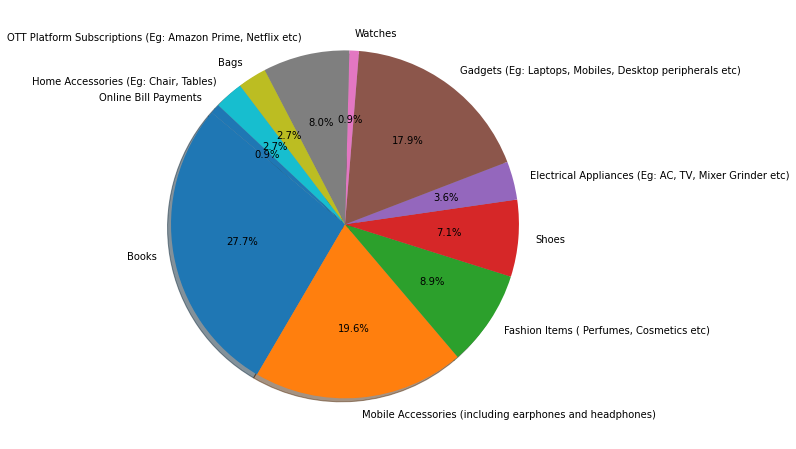

In [18]:
# pie chart for Tier 1

labels = new_list

plt.figure(figsize=(10, 8))
plt.pie(Tier_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

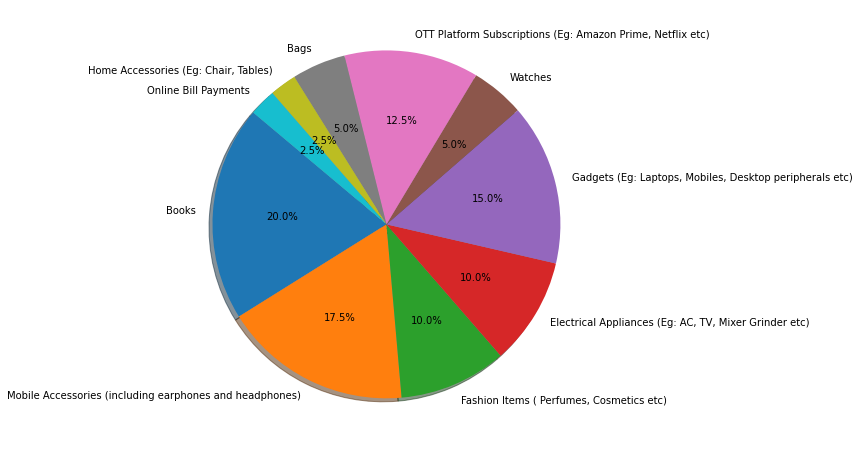

In [19]:
# pie chart for Tier 2

labels = labels2

plt.figure(figsize=(10, 8))
plt.pie(Tier_2, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

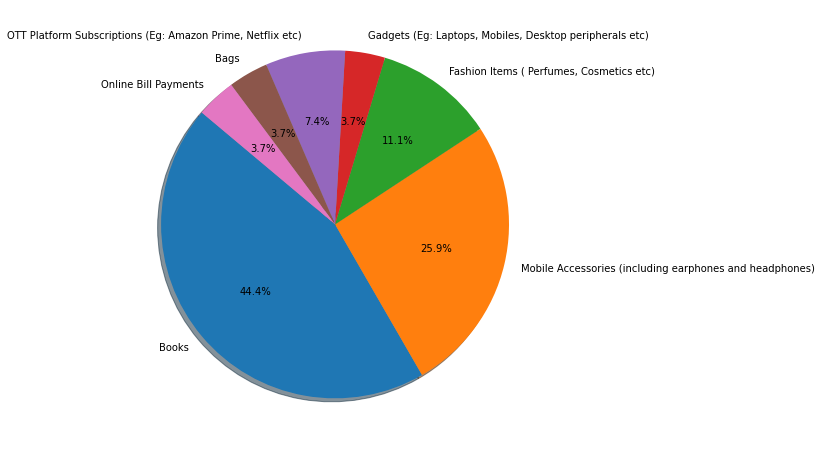

In [20]:
# pie chart for Tier 3

labels = labels3

plt.figure(figsize=(10, 8))
plt.pie(Tier_3, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

### Lastly we would love to see the distribution of things with respect to Employment Status

In [21]:
group_emp = data.groupby(['Product Interested in Buying Online', 'Employment Status'])

In [22]:
group_emp.count()

Age  \
Product Interested in Buying Online                Employment Status        
Bags                                               9-5 Job              1   
                                                   Business             1   
                                                   Housewife            2   
                                                   Retired              1   
                                                   Self-Employeed       3   
Books                                              9-5 Job              8   
                                                   Business             7   
                                                   Retired              1   
                                                   Self-Employeed       7   
                                                   Student             31   
Electrical Appliances (Eg: AC, TV, Mixer Grinde... 9-5 Job              5   
                                                   Self-Employeed       3   
                                                   Student              1   
Fashion Items ( Perfumes, Cosmetics etc)           9-5 Job              8   
                                                   Business             2   
                                                   Graduate             1   
                                                   Housewife            1   
                                                   Self-Employeed       5   
                                                   Student              5   
Gadgets (Eg: Laptops, Mobiles, Desktop peripher... 9-5 Job              4   
                                                   Business             5   
                                                   Housewife            1   
                                                   Retired              1   
                                                   Self-Employeed       5   
                                                   Student             15   
Home Accessories (Eg: Chair, Tables)               9-5 Job              2   
                                                   Business             1   
                                                   House wife           1   
                                                   Housewife            1   
                                                   Self-Employeed       1   
Mobile Accessories (including earphones and hea... 9-5 Job             12   
                                                   Business             2   
                                                   Housewife            1   
                                                   Self-Employeed       6   
                                                   Student             17   
OTT Platform Subscriptions (Eg: Amazon Prime, N... 9-5 Job              5   
                                                   Business             1   
                                                   Retired              1   
                                                   Self-Employeed       3   
                                                   Student              6   
Online Bill Payments                               9-5 Job              1   
                                                   Self-Employeed       1   
                                                   Student              1   
Shoes                                              9-5 Job              3   
                                                   Business             1   
                                                   Self-Employeed       3   
                                                   Student              3   
Watches                                            Self-Employeed       1   
                                                   Student              2   

                                                                      Gender  \
Product Interested in Buying Online                Employment 

**The demand of books, Mobile Accessories and Gadgets are quite high among the students . We will not be exploring the features 'You preferably use for shopping online' and 'Have you heard about XPay ?' because there's hardly any variance in the those two columns and therefore doesn't seem to affect the decisions much .**

In [24]:
# preferably used platform for shopping online
data.iloc[:, 7].value_counts()

Amazon                 116
Flipkart                73
Myntra                   3
Auto. Com                2
Nykaa                    1
Jio Mart                 1
Groccer                  1
Do not shop online       1
TataCLIQ                 1
Ajio                     1
Name: You preferably use  for shopping online, dtype: int64

We may conclude that most of the people use either **Amazon** or **Flipkart** for online shopping .

# Modelling the data for predicting the future outcomes

In [25]:
# here we are taking just the categorical variable to get the dummy variables 

features = ['Gender', 'City', 'Monthly Family Income', 'Employment Status']
target = ['Product Interested in Buying Online']

In [26]:
model_data = pd.get_dummies(data[features])
model_target = pd.get_dummies(data[target])

In [27]:
# Since we found that age is an important factor in our analysis so we'll include that as well .

model_data = pd.concat([model_data, data['Age']], axis=1)

In [28]:
train_X, test_X, train_y, test_y = train_test_split(model_data, model_target, test_size=0.2, random_state=1)

In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)
model.fit(train_X, train_y)

accuracy_score(test_y, model.predict(test_X)) * 100

30.0

**On performing the chi-square test we found that the Gender and Employment Status property can be easily rejected .**

In [30]:
# here we are taking just the categorical variable to get the dummy variables 
features = ['City', 'Monthly Family Income']
target = ['Product Interested in Buying Online']

model_data = pd.get_dummies(data[features])
model_target = pd.get_dummies(data[target])

model_data = pd.concat([model_data, data['Age']], axis=1)

train_X, test_X, train_y, test_y = train_test_split(model_data, model_target, test_size=0.2, random_state=1)

model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=1)
model.fit(train_X, train_y)

accuracy_score(test_y, model.predict(test_X)) * 100

37.5

# Conclusion

1) **Age , City and Monthly Family Income** turns out to be the most important factors in determining what ones buy from online stores . 